#Praktikum 1


##Langkah 1 - Load Data

In [7]:
import pandas as pd

data = 'Titanic-Dataset.csv' # path dataset
df = pd.read_csv(data) # load dataset

Penjelasan :

pada langkah 1 melakukan load data dengan menggunakan library pandas untuk melakukan load data ke dalam data frame

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Penjelasan :

sytax df.head() merupakan fungsi untuk menampilkan data teratas dari data yang telah di load  

##Langkah 2 - Pengecekan Data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Penjelasan :   

sytax df.info() digunakan untuk mengetahui informasi mengenai data yang telah di load, mulai dari nama coloum, jenis data, dan jumlah datanya

In [10]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Penjelasan :

Sytax df.isnull().sum() digunakan untuk mengetahui data yang hilang atau bernilai null di setiap kolom pada data yang telah di load

##Langkah 3 - Imputasi

In [11]:
df['Age'].fillna(value=df['Age'].mean(), inplace=True)

df['Cabin'].fillna(value="unknown", inplace=True)

df['Embarked'].fillna(value="unknown", inplace=True)

Penjelasan :

pada langkah ke ini melakukan pengisian nilai yang hilang dengan menggunakan fungsi dari pandas. untuk mengisi nilai yang hilang pada kolom age menggunakan nilai rata-rata, kolom Cabin menggunakan value string "DECK", dan kolom embrake menggunakan nilai modus

##Langkah 4 - Validasi Hasil

In [12]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Penjelasan :

Pada langkah ke  melakukan validasi hasil dari imputasi (pengisian nilai yang hilang pada kolom)

#Praktikum 2

##Langkah 0 - Load Library

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

Penjalasan :

Pada langkah pertama melakukan load library yang di butuhkan untuk menjalankan praktikum 2, library yang diambil yaitu pandas dan sklearn.preprocessing

##Langkah 1 - Load Data

In [17]:
dpath = 'Titanic-Dataset.csv'
df = pd.read_csv(dpath)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


penjelasan :

Pada langkaah 1 ini melakukan load data dari file csv yang telah di upload sebelumnya di google collab

##Langkah 2 - Slice Data

In [18]:
df = df[['Survived', 'Pclass', 'Age', 'Sex', 'Cabin']]
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,male,NaN
1,1,1,38.0,female,C85
2,1,3,26.0,female,NaN
3,1,1,35.0,female,C123
4,0,3,35.0,male,NaN


Penjelasan :

Pada langkah 2 melakukan slice data atau memilih data apa saya yang di anggap fitur untuk digunakan  

##Langkah 3 - Encoding

In [19]:
le = LabelEncoder() # membuat objek dari LabelEncoder
df['Sex'] = le.fit_transform(df['Sex']) # proses encoding
df['Cabin'] = le.fit_transform(df['Cabin']) # proses encoding

Penjelasan :

Pada langkah ke 3 ini melakukan proses encoding atau melakukan perubahan nilai data dengan memgkategorikan data menjadi numerik. pada praktikum ini terdapat 2 data yang dilakukan encoding

##Langkah 4 - Verifikasi Hasil

In [20]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,22.0,1,147
1,1,1,38.0,0,81
2,1,3,26.0,0,147
3,1,1,35.0,0,55
4,0,3,35.0,1,147


Penjelasan :

melakukan validasi dari hasil encoding dengan menampilkan data teratas

##Langkah 5 - Standarisasi

In [21]:
std = StandardScaler()
df['Age'] = std.fit_transform(df[['Age']])

Penjelasan :

pada langkah 5 ini melakukan standarisasi dengan menggunakan fungsi StandardScaler dari Scikit-learn untuk mentransformasikan data agar data memiliki rata-rata 0 dan deviasi standart 1

##Langakah 6 - Verifikasi hasil Standarisasi

In [23]:
df.head()

,Survived,Pclass,Age,Sex,Cabin
0,0,3,-0.530377,1,147
1,1,1,0.571831,0,81
2,1,3,-0.254825,0,147
3,1,1,0.365167,0,55
4,0,3,0.365167,1,147


Penjelasan :

Melakukan validasi data yang telah dilakukan encoding dan standarisasi

#Prktikum 3

##Strartified Split

###Langkah 1 - Load Data

In [26]:
import pandas as pd

df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Penjelasan :

pada tahap ini melakukan load data dan menampilkan data teratas

###Langkah 2 - Split Data

In [27]:
# Split data
from sklearn.model_selection import train_test_split

# Split data training dan dan lainnya
# data lainnya, akan kita split lagi menjadi validasi dan testing.
# Rasio yang akan kita gunakan adalah 8:1:1
df_train, df_unseen = train_test_split(df, test_size=0.2, random_state=0)

# Split lagi antara validasi dan testing
df_val, df_test = train_test_split(df_unseen, test_size=0.5, random_state=0)

# Cek masing-masing ukuran data

print(f'Jumlah data asli: {df.shape[0]}')
print(f'Jumlah data train: {df_train.shape[0]}')
print(f'Jumlah data val: {df_val.shape[0]}')
print(f'Jumlah data test: {df_test.shape[0]}')

# Cek rasio tiap label
print('=========')
print(f'Jumlah label data asli:\n{df.Survived.value_counts()}')
print(f'Jumlah label data train:\n{df_train.Survived.value_counts()}')
print(f'Jumlah label data val:\n{df_val.Survived.value_counts()}')
print(f'Jumlah label data test:\n{df_test.Survived.value_counts()}')

Jumlah data asli: 891
Jumlah data train: 712
Jumlah data val: 89
Jumlah data test: 90
Jumlah label data asli:
Survived
0    549
1    342
Name: count, dtype: int64
Jumlah label data train:
Survived
0    439
1    273
Name: count, dtype: int64
Jumlah label data val:
Survived
0    53
1    36
Name: count, dtype: int64
Jumlah label data test:
Survived
0    57
1    33
Name: count, dtype: int64


Penjelasan :

Pada langkah ini melakukan split atau pembagian data menjadi tiga bagian yaitu data training, data validation dan data testing

##Cross Validation

###Langkah 1 - Load Data

In [28]:
import pandas as pd

df3 = pd.read_csv('Titanic-Dataset.csv')
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Penjelasan :

Pada tahap ini melakukan load data dan melakukan load library

###Langkah 2 - Split Data

In [29]:
# Implementasi k-fold cross validation (random) dengan training dan testing saja
from sklearn.model_selection import KFold

# inisiasi obyek kfold
kf = KFold(n_splits=4)
print(f'Jumlah fold: {kf.get_n_splits()}')
print(f'Obyek KFold: {kf}')

# Lakukan splitting dengan KFold
kf_split = kf.split(df3)
print(f'Jumlah data df: {df.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df: 891
Index train: [223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240
 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258
 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276
 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 44

Penjelasan :

pada tahap ini melakukan split data dengan menggunakan k-fold cross-validation dan melakukan validasi data dengan menggunakan perulangan untuk menampilkan indeks data


##Cross Validation 2

###Langkah 1 - Load Data

In [30]:
import pandas as pd

df4 = pd.read_csv('Titanic-Dataset.csv')
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Penjelasan :

Melakukan load data dan load library pandas, serta menampilkan data teratas

###Langkah 2 - Split Data

In [31]:
# Implementasi k-fold cross validation (random) dengan training, validation, dan testing data
from sklearn.model_selection import train_test_split, KFold

# Split dulu antara data training dan testing dengan train_test_split
# Rasio 8:2 untuk training dan testing
df4_train, df4_test = train_test_split(df4, test_size=0.2, random_state=0)

# inisiasi obyek kfold
kf2 = KFold(n_splits=4)
print(f'Jumlah fold: {kf2.get_n_splits()}')
print(f'Obyek KFold: {kf2}')

# Lakukan splitting dengan KFold untuk data df_training
# Dengan acara ini, kita masih memiliki data testing untuk keperluan pengujian model
# namun tetap dapat melakukan evaluasi dengan menggunakan data validasi
kf2_split = kf2.split(df_train)
print(f'Jumlah data df_train: {df4_train.shape[0]}')

# cek index data tiap fold
for train_index, test_index in kf2_split:
    print(f'Index train: {train_index} | Index test: {test_index}')

Jumlah fold: 4
Obyek KFold: KFold(n_splits=4, random_state=None, shuffle=False)
Jumlah data df_train: 712
Index train: [178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195
 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213
 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231
 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249
 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267
 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285
 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303
 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321
 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339
 340 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357
 358 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375
 376 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393
 394 

Penjelasan :

pada tahap ini melakukan pembagian data dengan menggunakan 2 teknik yaitu train_test_split dan menggunakan KFold untuk menghasilkan data pengujian yang terpisah


#Praktikum 4

##Langkah 1 - Load Image

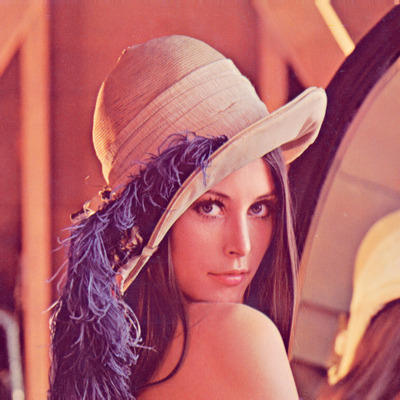

In [5]:
from PIL import Image

img = Image.open('image.jpg')
img.show() # tampilkan gambar
display(img) # metode alternatif tampilkan gambar

Penjelasan :

Pada Langkah ini melakukan impor library pillow yang digunakan untuk memproses gambar

##Langkah 2 - Ekstrak Fitur

In [6]:
# Ekstrak setiap channel red, green, blue
r, g, b = img.split()

# Cek panjang ukuran channel red
print(len(r.histogram()))

# Cetak fitur histogram pada channel red
print(r.histogram())

256
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 4, 2, 6, 6, 8, 7, 6, 24, 16, 25, 34, 43, 53, 80, 79, 106, 139, 136, 181, 183, 222, 279, 297, 336, 382, 443, 474, 535, 593, 709, 738, 804, 877, 875, 907, 954, 946, 982, 959, 1000, 976, 1002, 1001, 889, 885, 855, 830, 738, 712, 674, 621, 600, 542, 508, 506, 484, 426, 426, 405, 405, 391, 362, 371, 378, 360, 342, 339, 381, 324, 376, 374, 374, 403, 392, 390, 382, 411, 420, 407, 431, 419, 437, 432, 412, 418, 468, 458, 449, 490, 471, 536, 443, 459, 444, 521, 489, 504, 492, 493, 489, 544, 539, 510, 566, 565, 574, 551, 567, 573, 588, 619, 602, 669, 728, 735, 835, 964, 1010, 1063, 1075, 1135, 1124, 1065, 1001, 871, 928, 862, 878, 852, 905, 880, 967, 973, 1060, 1055, 1173, 1155, 1168, 1184, 1113, 1165, 1135, 1149, 1240, 1278, 1444, 1479, 1689, 1928, 1907, 2020, 2072, 2078, 2016, 1951, 1876, 1702, 1597, 1532, 1566, 1670, 1644, 

Penjelasan :

Pada tahap ini melakukan ekstrak histogram RGB pada gambar dan disimpan pada array, sebagai contoh menampilkan histogram pada chanel Red

#Tugas Praktikum

Deskripsi Tugas

Pada tugas pratikum ini Anda akan menggunakan data "Wisconsin Breast Cancer". Data tersebut terdiri dari 569 data yang digunakan untuk mendiagnonis jenis kanker Malignant (M) dan Benign (B). Tugas Anda adalah,

1.   Pisahkan antara variabel yang dapat digunakan dan variabel yang tidak dapat digunakan.
2.   Lakukan proses encoding pada kolom "diagnosis".
3. Lakukan proses standarisasi pada semua kolom yang memiliki nilai numerik.'
4. Lakukan proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.




##1. Melakukan Load Data

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

wbc = pd.read_csv('wbc.csv')
wbc.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Penjelasan :

Pada tahap pertama ini melakukan load data Wisconsin breast Cancer dan melakukan load library yang dibutuhkan diantaranya pandas, sklearn.model_selection, sklearn.processing

##2. Memisahkan variabel yang dapat digunakan dan tidak dapat digunakan


In [29]:
wbc = wbc.drop(columns=['id', 'Unnamed: 32'])
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Penjelasan :

Pada tahapan ini melakukan pemisahan variabel yang dapat digunakan dan tidak dapat digunakan, pada studi kasus kali ini terdapat 2 variabel yang tidak digunakan yaitu id dan Unnamed 32. Untuk melakukan pemisahan data terdapat 2 cara diantaranya :

1. menyimpan ulang data yang digunakan pada variabel array wbc :



```
wbc = wbc[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']]
```

2. Melakukan drop pada kolom/variabel yang tidak digunakan :

```
data = data.drop(columns=['id', 'Unnamed: 32'])

```




##3. Melakukan Encoding pada kolom "Diagnosis"

In [30]:
le = LabelEncoder()
wbc['diagnosis'] = le.fit_transform(wbc['diagnosis'])
wbc.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Penjelasan :

pada tahapan ini melakukan encoding dimana nilai dari kolom/fitur diagnosis diubah menjadi 1 dan 0 :

Malignant (M)   ->  1

Benign (B)      ->  0

##4. Standarisasi pada semua kolom yang memiliki nilai numerik

In [39]:

#memisahkan data untuk fitur dan target(label) \
x = wbc.drop(columns=['diagnosis'])
y = wbc['diagnosis']

#standarisasi data
std = StandardScaler()
wbc_std = std.fit_transform(x)

#validation
wbc_std = pd.DataFrame(wbc_std, columns=x.columns)
wbc_std.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


Penjelasan :

pada tahapan ini melakukan stadarisasi pada semua kolom yang memiliki nilai numerik, akan tetapi sebelum melakukan standarisasi melakukan pemisahan data yang digunakan untuk fitur dan target(label), setelah itu data fitur yang telah dipidahkan di convert menjadi data frame

##Proses stratified split data untuk membuat data latih dan data uji dengan rasio 80:20.

In [42]:
wbc_std_train, wbc_std_test, y_train, y_test = train_test_split(wbc_std, y, test_size=0.2, random_state=0, stratify=y)

print(f'Jumlah label data asli:\n{y.value_counts()}')
print(f'Jumlah label data train:\n{y_train.value_counts()}')
print(f'Jumlah label data test:\n{y_test.value_counts()}')

Jumlah label data asli:
diagnosis
0    357
1    212
Name: count, dtype: int64
Jumlah label data train:
diagnosis
0    285
1    170
Name: count, dtype: int64
Jumlah label data test:
diagnosis
0    72
1    42
Name: count, dtype: int64


penjelasan :

Pada tahap ini melakukan split data yang akan digunakan untuk train model dan uji coba